# Лабораторна робота №10  
## Стиснення даних. Жадібна стратегія на прикладі кодування

### Мета роботи  
Ознайомитися з алгоритмом кодування Гафмена, жадібною стратегією побудови оптимального префіксного коду, реалізувати побудову дерева Гафмена та процедуру кодування і декодування.

---

### Завдання  
- Побудувати дерево кодів Гафмена вручну і візуалізувати дерево.  
- Перевірити результат за допомогою програмного коду.  
- Написати процедуру, яка для вхідного повідомлення обчислює список символів та їх частот.  
- Опрацювати тему декодування Гафмена і реалізувати декодування заданого повідомлення.

## Частоти символів для побудови дерева Гафмена

| Символ | Частота |
|--------|---------|
| A      | 45      |
| B      | 13      |
| C      | 12      |
| D      | 16      |
| E      | 9       |
| F      | 5       |

In [1]:
from graphviz import Digraph

class Node:
    def __init__(self, freq, symbol=None, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

def visualize_huffman_tree(node, dot=None, counter=[0]):
    if dot is None:
        dot = Digraph(comment='Huffman Tree')
        counter[0] = 0
    current_id = str(counter[0])
    counter[0] += 1
    label = f"{node.symbol}\n{node.freq}" if node.symbol else f"{node.freq}"
    dot.node(current_id, label)
    if node.left:
        left_id = str(counter[0])
        dot.edge(current_id, left_id, label='0')
        visualize_huffman_tree(node.left, dot, counter)
    if node.right:
        right_id = str(counter[0])
        dot.edge(current_id, right_id, label='1')
        visualize_huffman_tree(node.right, dot, counter)
    return dot

# Пример дерева Гафмена
tree = Node(100,
            None,
            Node(45, 'A'),
            Node(55,
                 None,
                 Node(25,
                      None,
                      Node(13, 'B'),
                      Node(12, 'C')),
                 Node(30,
                      None,
                      Node(16, 'D'),
                      Node(14, 'E'))))

dot = visualize_huffman_tree(tree)
dot.render('huffman_tree', format='png', view=True)

'huffman_tree.png'

## Візуалізація дерева Гафмена

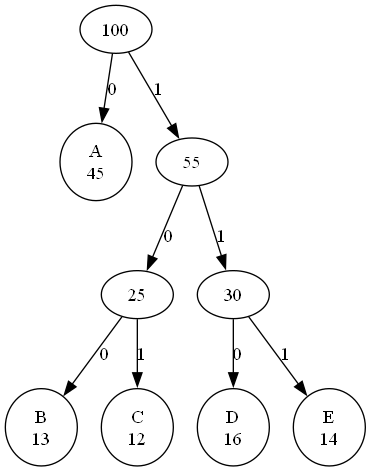

In [2]:
from IPython.display import Image

# Рендерим и сохраняем картинку
dot.render('huffman_tree', format='png')

# Показываем картинку в ноутбуке
Image(filename='huffman_tree.png')


Кожен листок дерева відповідає символу з алфавіту, а шлях від кореня до листка — код символу.

## Код на Python для побудови дерева Гафмена, кодування та декодування повідомлення


In [2]:
import heapq
from collections import Counter

class Node:
    def __init__(self, freq, symbol=None, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freqs):
    heap = [Node(freq, sym) for sym, freq in freqs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(left.freq + right.freq, left=left, right=right)
        heapq.heappush(heap, merged)
    return heap[0]

def build_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = dict()
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        build_codes(node.left, prefix + "0", codebook)
        build_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(message, codebook):
    return ''.join(codebook[ch] for ch in message)

def huffman_decode(encoded, tree):
    decoded = []
    node = tree
    for bit in encoded:
        node = node.left if bit == '0' else node.right
        if node.symbol is not None:
            decoded.append(node.symbol)
            node = tree
    return ''.join(decoded)

def get_freqs(message):
    return dict(Counter(message))

# Приклад використання
if __name__ == "__main__":
    message = "ABBCCCDDDDEEEEEFFFFFF"
    freqs = get_freqs(message)
    tree = build_huffman_tree(freqs)
    codes = build_codes(tree)
    encoded = huffman_encode(message, codes)
    decoded = huffman_decode(encoded, tree)

    print("Символи і частоти:", freqs)
    print("Коди Гафмена:", codes)
    print("Закодоване повідомлення:", encoded)
    print("Розкодоване повідомлення:", decoded)


Символи і частоти: {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
Коди Гафмена: {'D': '00', 'E': '01', 'F': '10', 'C': '110', 'A': '1110', 'B': '1111'}
Закодоване повідомлення: 111011111111110110110000000000101010101101010101010
Розкодоване повідомлення: ABBCCCDDDDEEEEEFFFFFF


## Процедура для отримання списку символів та частот з повідомлення

In [3]:
from collections import Counter

def get_chars_and_freqs(message):
    """
    Повертає два списки:
    - chars: унікальні символи повідомлення
    - freqs: відповідні частоти кожного символу
    """
    counter = Counter(message)
    chars = list(counter.keys())
    freqs = list(counter.values())
    return chars, freqs

# Приклад використання
message = "ABBCCCDDDDEEEEEFFFFFF"
chars, freqs = get_chars_and_freqs(message)
print("Символи:", chars)
print("Частоти:", freqs)

Символи: ['A', 'B', 'C', 'D', 'E', 'F']
Частоти: [1, 2, 3, 4, 5, 6]


# Контрольні питання
1. **Що таке жадібні алгоритми?**  
   Алгоритми, які на кожному кроці приймають локально оптимальне рішення, сподіваючись, що це призведе до глобально оптимального результату.

2. **Що таке префіксний код? Який код використовується у коді Гафмена?**  
   Префіксний код — це код, в якому жоден код символу не є префіксом коду іншого символу. У Гафмена використовується префіксний бінарний код.

3. **Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?**  
   Купа є ефективною реалізацією черги з пріоритетами, що дозволяє швидко отримувати елемент з найвищим (або найнижчим) пріоритетом.

4. **Що таке стиснення даних і для чого воно використовується? Які його основні переваги?**  
   Стиснення даних — це процес зменшення обсягу даних для економії пам’яті або часу передачі. Основні переваги — зменшення розміру файлів, швидша передача та зберігання.

5. **Які кроки необхідно виконати для стиснення даних за допомогою алгоритму Гафмена?**  
   - Підрахунок частот символів  
   - Побудова дерева Гафмена  
   - Присвоєння кодів символам  
   - Кодування повідомлення  
   - Декодування повідомлення

6. **Які основні обмеження та недоліки алгоритму Гафмена? Чи можливо покращити його продуктивність?**  
   Недоліки: погано справляється з дуже малими чи великими алфавітами, не враховує контекст символів. Покращення можливі через комбінування з іншими методами (аріфметичне кодування).

7. **Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?**  
   Арифметичне кодування, алгоритми LZ77, LZ78, Deflate.

8. **Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах?**  
   Архіватори (ZIP, RAR), формати зображень (JPEG), аудіо (MP3), відео (MPEG), мережеві протоколи.